# Support Vector Machine

Objective: Predict Fall detection data set of Chinese hospitals of old age patients.  
           0- Standing 1- Walking 2- Sitting 3- Falling 4- Cramps 5- Running  
Dataset: falldetection.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('falldetection.csv')
print(data.shape)
data.head()

(16382, 7)


,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


## Data Exploration

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64


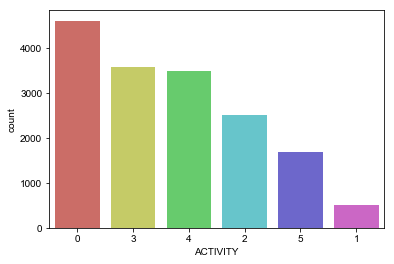

In [2]:
print(data['ACTIVITY'].value_counts())

sns.countplot(x='ACTIVITY',data = data, palette='hls',order = data['ACTIVITY'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [4]:
data.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


## Correlation

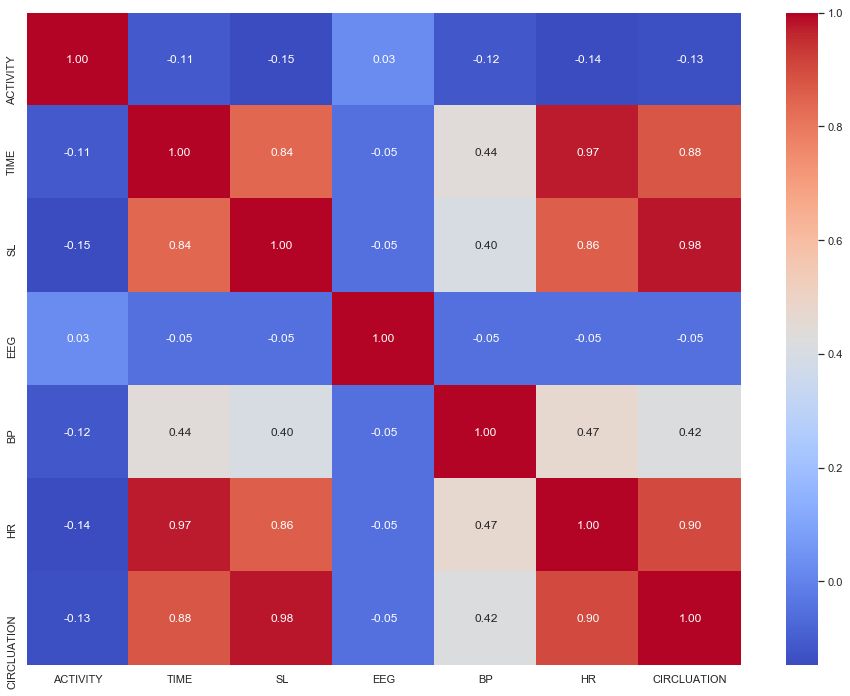

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["ACTIVITY"].sort_values(ascending=False)

ACTIVITY       1.000000
EEG            0.027084
TIME          -0.110405
BP            -0.116499
CIRCLUATION   -0.134331
HR            -0.144609
SL            -0.146789
Name: ACTIVITY, dtype: float64

## Data Processing and Selection

In [7]:
X=data.iloc[:, 1:] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (16382, 6)


,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,79,317
1,4059.12,2191.03,-1146.08,20,54,165


In [8]:
y = data["ACTIVITY"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (16382,)


0    3
1    2
2    2
3    4
4    4
Name: ACTIVITY, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (16382, 6)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[-1.18106151, -0.55884911,  0.03715777, -0.93704095, -1.01994249,
        -0.67367192],
       [-1.30722797, -0.57319134,  0.04135228, -0.79208776, -1.21233075,
        -0.71340206]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Default Parameter
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(gamma='auto') #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Kernel Accuracy Score')
print('- Default:',round(metrics.accuracy_score(y_test,y_pred),4))

#Linear Kernel
svc=SVC(kernel='linear', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Linear :',round(metrics.accuracy_score(y_test,y_pred),4))

#RBF Kernel
svc=SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- RBF    :', round(metrics.accuracy_score(y_test,y_pred),4))

#Polynomial kernel
svc=SVC(kernel='poly', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Polynomial:', round(metrics.accuracy_score(y_test,y_pred),4))

Kernel Accuracy Score
- Default: 0.379
- Linear : 0.3464
- RBF    : 0.379
- Polynomial: 0.293


In [11]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('Linear accuracy score:', round(accuracy_score,4))

Linear accuracy score: 0.3113


## Test Prediction

In [12]:
df_pred1 = data[data.index == 10]
df_pred2 = data[data.index == 30]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
10,0,7069.95,15336.6,-3000.09,81,133,847
30,4,11983.70,46065.4,-5543.47,49,273,2061


In [13]:
df_pred=df_pred.iloc[:, 1:]
scaler = StandardScaler()
scaler.fit(df_pred)
df_pred = scaler.transform(df_pred)

predict_result=svc.predict(df_pred)
predict_result

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([4, 0], dtype=int64)